# Лабораторная работа: Численные методы

- Студент: Платов Дмитрий Константинович
- Группа: 6
- Дата: 23.02.26
- Весь код в файле ".py": https://github.com/PlatovD/numerical_methods_for_solving_nonlinear_equations

## Цель работы
Изучение численных методов решения нелинейных уравнений
ознакомление с синтаксисом и базовыми операторами языка Python.

<br><br>
## Ход работы

### 1. Подготовительный этап
Импортируем необходимые библиотеки и определим испоьзуемые константы

In [1]:
%matplotlib inline
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

EPS = 0.0001

Определяю функции для удобства и для того, чтобы код был переиспользуемым 

In [2]:
def f(x: float):
    return pow(x, 3) - 6 * pow(x, 2) + 5 * x


def analytic_hardcode_derivative(x: float):
    return 3 * pow(x, 2) - 12 * x + 5


def numeric_derivative(f: callable, x: float):
    return (f(x + EPS) - f(x - EPS)) / (2 * EPS)


def sign(val: float):
    if val > 0: return 1
    if val < 0: return -1
    return val

<br><br>

### 2. Визуализация исследуемой функции и интервалов поиска корня
В этом блоке я одновременно визуализирую функцию f и нахожу интервалы, на которых можно запускать алгоритмы поиска корня. Это необходимо, потому что без предварительного поиска интервалов каждый численный метод найдет только один корень. Однако функция может быть немонотонной и пересекать ось x в нескольких точках (как в нашем случае).

<br>

Определю вспомогательные функции.

In [6]:
def find_roots_intervals(f: callable, left_border: float, right_border: float,
                         borders_accuracy_step: float = 0.5):
    parts = [left_border, ]
    current_right = left_border + borders_accuracy_step
    while current_right < right_border:
        l = numeric_derivative(f, current_right - borders_accuracy_step)
        r = numeric_derivative(f, current_right)
        if l * r <= 0:
            parts.append(
                bisection_method(lambda x: numeric_derivative(f, x), current_right - borders_accuracy_step,
                                 current_right,
                                 1000))
            current_right += borders_accuracy_step
        current_right += borders_accuracy_step
    parts.append(right_border)
    return parts

def draw_function_graphic(f: callable, left_border: float, right_border: float, roots_intervals: List[float],
                          step: float = 0.1):
    if not roots_intervals:
        roots_intervals = []
    x_points = []
    y_points = []

    current_x = left_border
    while current_x <= right_border:
        x_points.append(current_x)
        y_points.append(f(current_x))
        current_x += step

    x_root_intervals_points = []
    y_root_intervals_points = []

    for current_x in roots_intervals:
        x_root_intervals_points.append(current_x)
        y_root_intervals_points.append(f(current_x))

    create_visualization_graphic(x_points, y_points, x_root_intervals_points, y_root_intervals_points)


def create_visualization_graphic(x_points: List[float], y_points: List[float], x_root_intervals_points: List[float],
                                 y_root_intervals_points: List[float]):
    data = pd.DataFrame({'x': x_points, 'y': y_points})

    sns.set_theme(style="ticks")
    sns.set_palette("muted")

    fig, ax = plt.subplots(figsize=(12, 7))

    sns.lineplot(data=data, x='x', y='y',
                 linewidth=2.5,
                 ax=ax)
    __highlight_intervals_borders(x_root_intervals_points, y_root_intervals_points)
    sns.despine(top=True, right=True)

    ax.set_title('График функции', fontsize=16, fontweight='light', pad=20)
    ax.set_xlabel('Ось X', fontsize=12)
    ax.set_ylabel('Ось Y', fontsize=12)

    ax.grid(True, linestyle='-', alpha=0.3, color='gray')

    ax.tick_params(axis='both', which='major', labelsize=11)

    plt.tight_layout()
    plt.show()

def __highlight_intervals_borders(x_root_intervals_points: List[float], y_root_intervals_points: List[float]):
    plt.scatter(x_root_intervals_points, y_root_intervals_points,
                color='orange', s=200,
                linewidth=4,
                marker='|',
                zorder=5)

def bisection_method(f: callable, left_border: float, right_border: float, iterations: int):
    l = left_border
    val_l = f(l)
    r = right_border
    val_r = f(r)

    cnt_it = iterations
    while cnt_it:
        c = l + (r - l) / 2
        val = f(c)
        if sign(val) == sign(val_l):
            l = c
            val_l = val
        else:
            r = c
            val_r = val

        cnt_it -= 1

    return l + (r - l) / 2

Теперь я готов к визуализации функции и ее интервалов

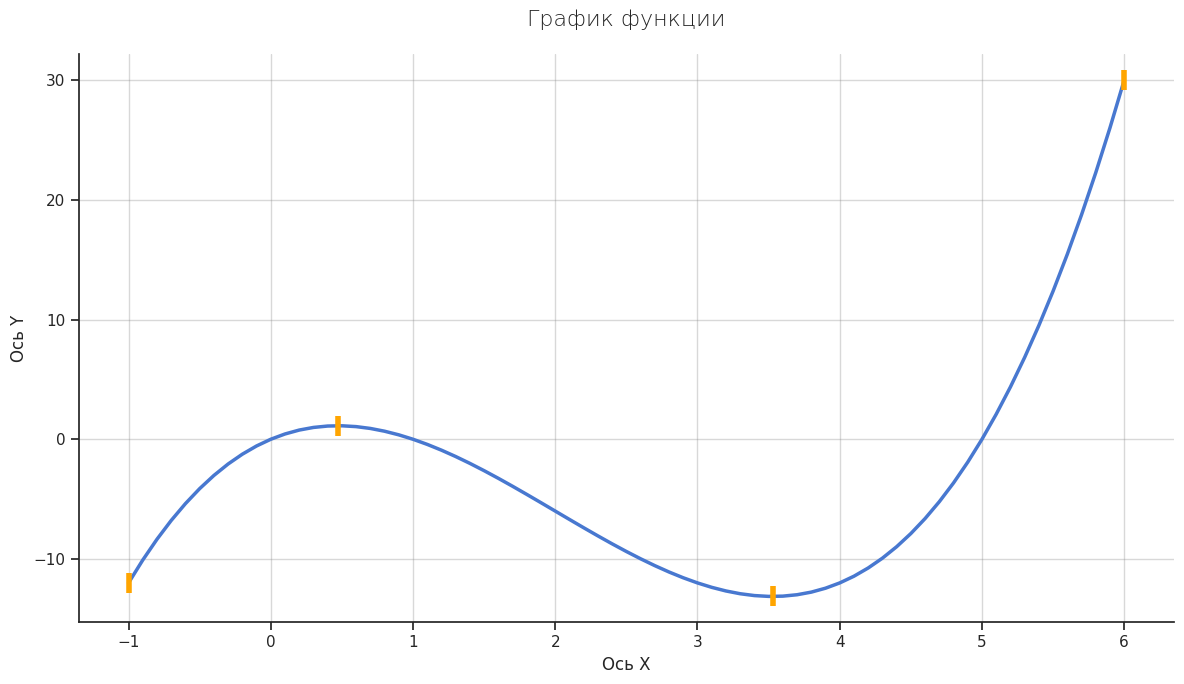

In [7]:
draw_function_graphic(f, -1, 6, roots_intervals=find_roots_intervals(f, -1, 6))


Здесь сразу виден прикладной характер численных методов — я использую бисекцию, чтобы точно поймать точку, где производная обращается в ноль. А сами интервалы — это по сути промежутки монотонности функции. Их я нахожу через производную, а производную, чтобы не привязываться к аналитическому виду функции, считаю численно. Такие интервалы мне нужны чтобы знать, где запускать численные методы поиска корня.

<br>

### 3. Реализация численных методов поиска корня уравнения f(x) = 0
В этом блоке написан код, который отвечает за поиск корней функции на определенном промежутке

In [15]:
def bisection_method(f: callable, left_border: float, right_border: float, iterations: int):
    l = left_border
    val_l = f(l)
    r = right_border
    val_r = f(r)

    cnt_it = iterations
    while cnt_it:
        c = l + (r - l) / 2
        val = f(c)
        if sign(val) == sign(val_l):
            l = c
            val_l = val
        else:
            r = c
            val_r = val

        cnt_it -= 1

    return l + (r - l) / 2


def chord_method(f: callable, left_border: float, right_border: float, iterations: int):
    l = left_border
    val_l = f(l)
    r = right_border
    val_r = f(r)
    c = l - val_l * (r - l) / (val_r - val_l)

    cnt_it = iterations
    while cnt_it:
        c = l - val_l * (r - l) / (val_r - val_l)
        val = f(c)
        if sign(val) == sign(val_l):
            l = c
            val_l = val
        else:
            r = c
            val_r = val

        cnt_it -= 1

    return c


def newton_method(f: callable, left_border: float, right_border: float, iterations: int):
    x = left_border + (right_border - left_border) / 2
    cnt_it = iterations

    while cnt_it:
        x = x - f(x) / analytic_hardcode_derivative(x)
        cnt_it -= 1

    return x


def is_between(s: float, l: float, r: float):
    return l <= s <= r


def find_all_roots(method: callable, f: callable, left_border: float, right_border: float,
                   roots_intervals: List[float] = None,
                   iterations: int = 1000,
                   borders_accuracy_step: float = 0.5):
    if not roots_intervals:
        parts = find_roots_intervals(f, left_border, right_border, borders_accuracy_step)
    else:
        parts = roots_intervals
    roots = []
    i = 1
    while i < len(parts):
        root = method(f, parts[i - 1], parts[i], iterations)
        roots.append(root)
        i += 1

    return roots

Все три метода реализованы достаточно компактно и могут использоваться для поиска корней на любом интервале, где функция меняет знак. На практике они работают быстро — алгоритмическая сложность у каждого примерно O(log n), что вполне приемлемо даже для большого числа итераций. Все формулы для реализации взяты кратких теоретических сведений. так же в самом конце представлен код функции, которая позволяет найти все корни на интервале даже когда исследуемая функция на нем не монотонна. 

<br><br>

### 4. Сравнение методов

In [11]:
def create_comparison_graphic(methods: List[callable], f: callable, borders: List[float], colors: List[str],
                              legend: List[str],
                              iterations_interval: List[int],
                              roots: List[float], step: int = 2, custom_scale: str = None):
    if len(iterations_interval) != 2: raise ValueError('iterations_interval must contain [a, b] only')

    sns.set_theme(style="ticks")
    sns.set_palette("muted")
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.set_title('Сравнительный график точности', fontsize=16, fontweight='light', pad=20)
    ax.set_xlabel('Число итераций', fontsize=12)
    ax.set_ylabel('Ошибка E суммарная', fontsize=12)
    ax.grid(True, linestyle='-', alpha=0.3, color='gray')
    ax.tick_params(axis='both', which='major', labelsize=11)
    if custom_scale:
        ax.set_yscale(custom_scale)

    iterations = [_ for _ in range(iterations_interval[0], iterations_interval[1], step)]
    parts = find_roots_intervals(f, borders[0], borders[1])
    for i in range(len(methods)):
        __draw_accuracy_graphic(methods[i], f, parts, colors[i], legend[i], iterations, roots, ax)

    plt.tight_layout()
    plt.legend()
    plt.show()


def __draw_accuracy_graphic(method: callable, f: callable, parts: List[float], color: str, legend: str,
                            iterations: List[int],
                            roots: List[float], ax):
    points_x = []
    points_y = []
    for i in iterations:
        res = find_all_roots(method, f, 0, 0, parts, i)
        error = sum(abs(roots[i] - res[i]) for i in range(len(res)))
        points_x.append(i)
        points_y.append(error)

    data = pd.DataFrame({'x': points_x, 'y': points_y})
    sns.lineplot(data=data, x='x', y='y',
                 linewidth=2.5,
                 color=color,
                 label=legend,
                 ax=ax)

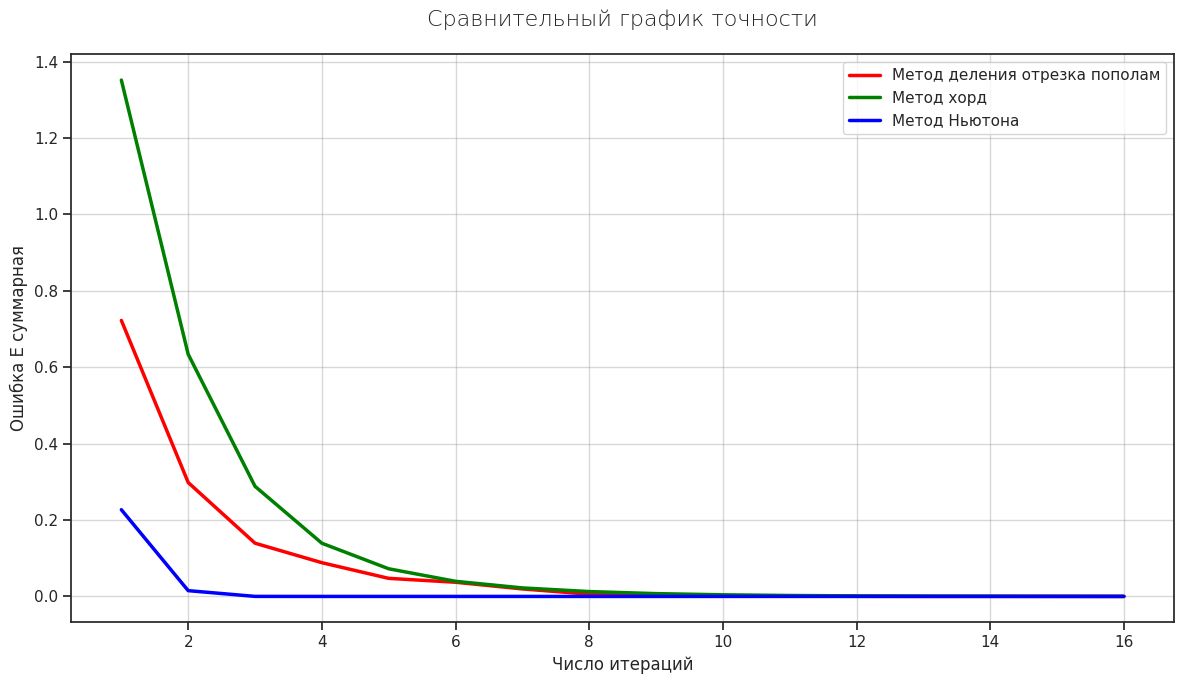

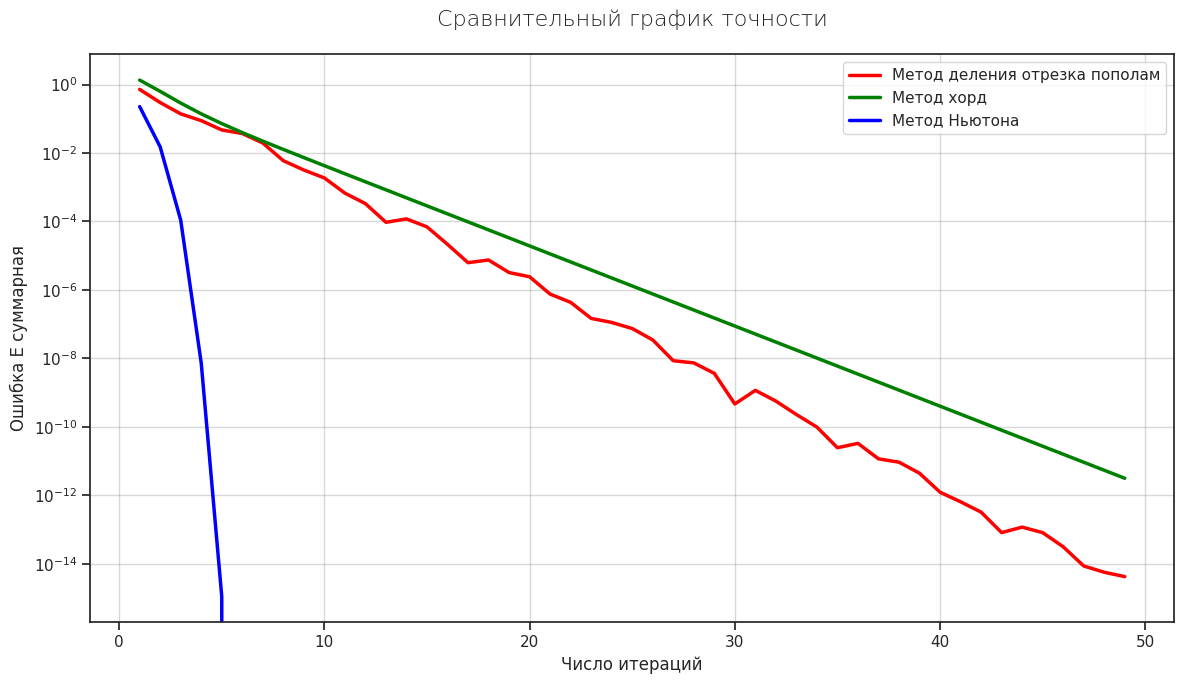

In [16]:
    create_comparison_graphic([bisection_method, chord_method, newton_method], f, [-1, 6], ['red', 'green', 'blue'],
                              ['Метод деления отрезка пополам', 'Метод хорд', 'Метод Ньютона'],
                              [1, 17], [0, 1, 5], step=1)
    create_comparison_graphic([bisection_method, chord_method, newton_method], f, [-1, 6], ['red', 'green', 'blue'],
                              ['Метод деления отрезка пополам', 'Метод хорд', 'Метод Ньютона'],
                              [1, 50], [0, 1, 5], step=1, custom_scale='log')

На графиках выше показана зависимость ошибки от числа итераций для каждого метода. Это позволяет наглядно сравнить, как быстро они сходятся к точному решению. Первый график построен в линейной шкале, второй — в логарифмической, чтобы лучше видеть разницу на малых значениях ошибки.

У нас получилась весьма необычная ситуация, когда метод бисекций лучше подошел к функции. Судя по моим исследованиям все дело в том, что первый из трех корней "не очень удачный" для метода хорд. Это подтверждают следующие эксперементы:

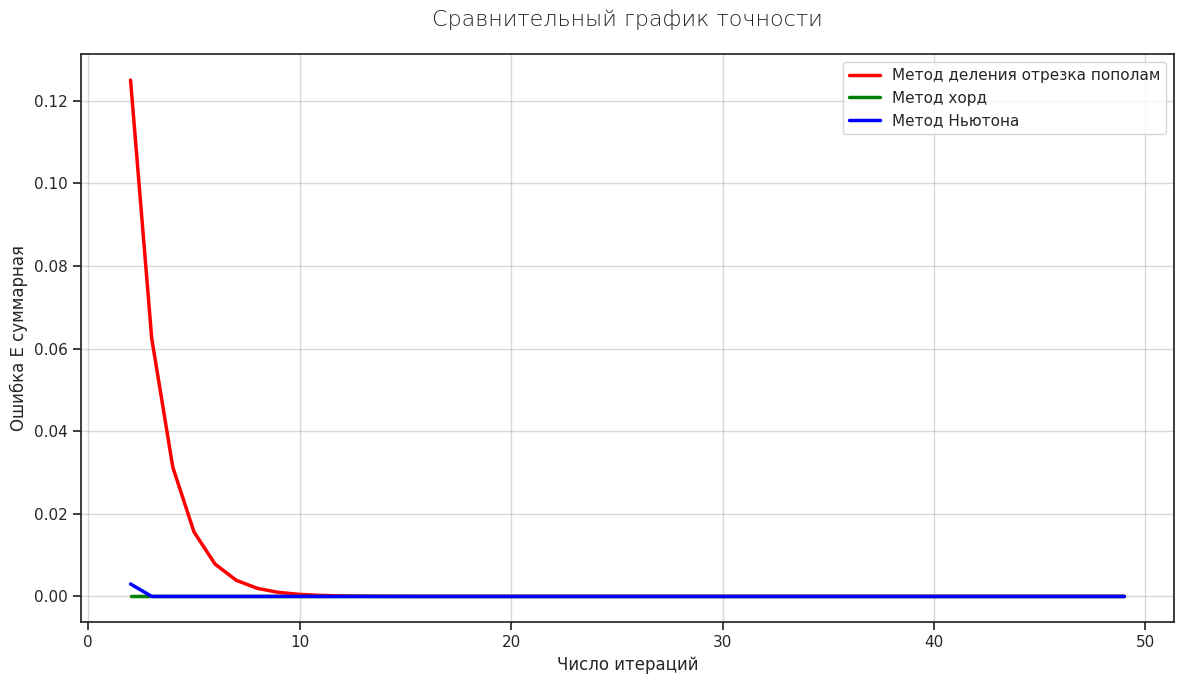

In [29]:
create_comparison_graphic([bisection_method, chord_method, newton_method], f, [5, 6], ['red', 'green', 'blue'],
                              ['Метод деления отрезка пополам', 'Метод хорд', 'Метод Ньютона'],
                              [2, 50], [5], step=1)

Здесь я специально запустил на таком интервале, на котором лежит 3ий корень

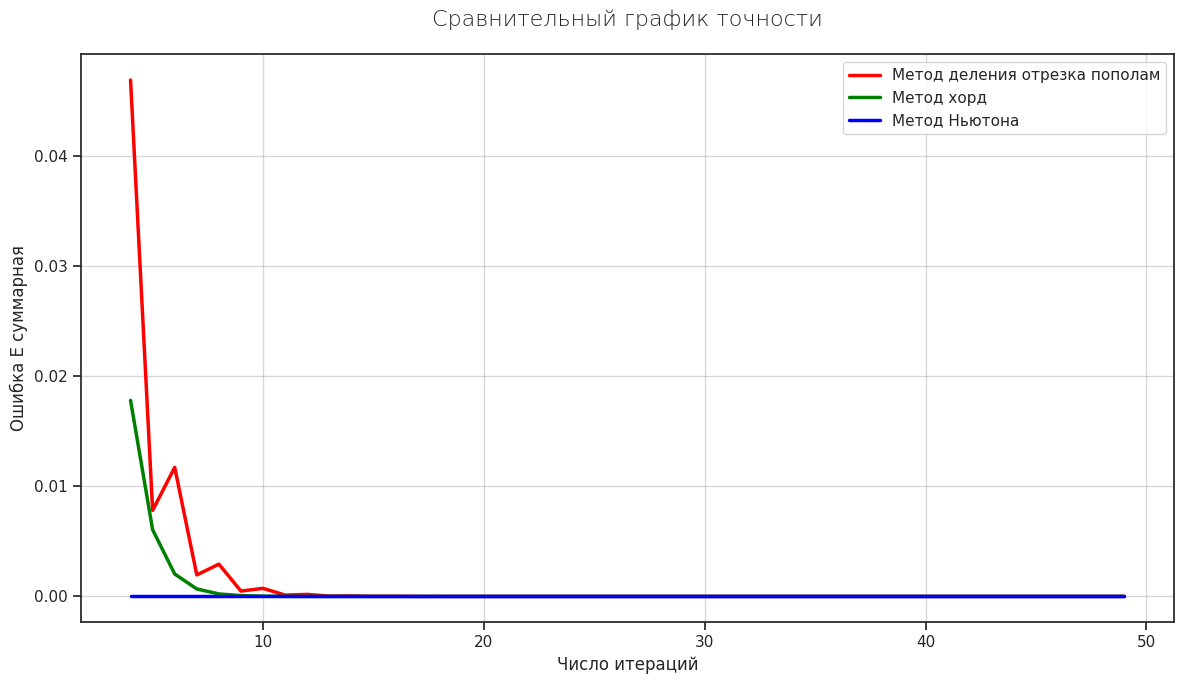

In [25]:
create_comparison_graphic([bisection_method, chord_method, newton_method], f, [0.5, 3], ['red', 'green', 'blue'],
                              ['Метод деления отрезка пополам', 'Метод хорд', 'Метод Ньютона'],
                              [4, 50], [1], step=1)

Здесь я специально запустил на таком интервале, на котором лежит 2ой корень

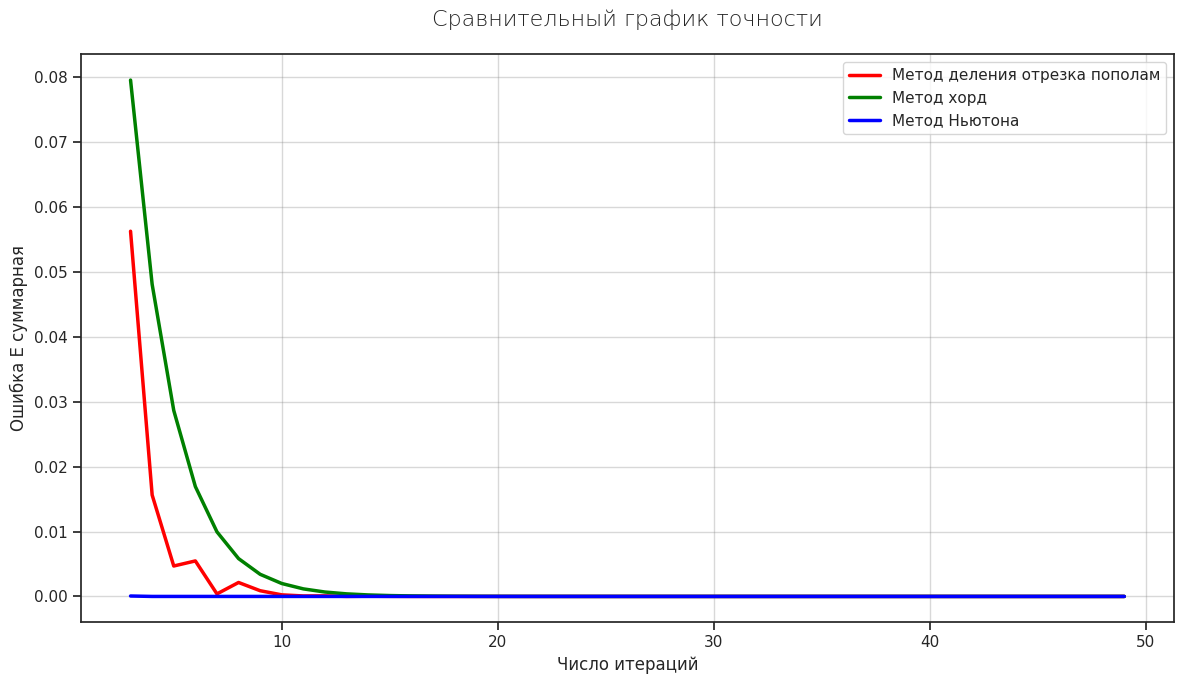

In [23]:
    create_comparison_graphic([bisection_method, chord_method, newton_method], f, [-1, 0.3], ['red', 'green', 'blue'],
                              ['Метод деления отрезка пополам', 'Метод хорд', 'Метод Ньютона'],
                              [1, 50], [0], step=1)

А вот как раз тот самый случай, когда метод хорд оказался хуже чем метод бисекций